#Part 4 - Logistic Regression and MLP

In [ ]:
# suppress war
import warnings
warnings.filterwarnings('ignore')

### Import necessary libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# min-max scaling for scaling
from sklearn.preprocessing import MinMaxScaler
# smote for oversampling
from imblearn.over_sampling import SMOTE
# data shuffling
from sklearn.utils import shuffle
#import logistic regression model
from sklearn.linear_model import LogisticRegression
# import cross validation score
from sklearn.model_selection import cross_val_score
# import accuracy score
from sklearn.metrics import accuracy_score
# import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
import tensorflow as tf
from typing import Tuple, Union

---

### Data Pre-Processing


In [ ]:
X_train = pd.read_csv('CompleteDataSet/x_train_all.csv')
X_test = pd.read_csv('CompleteDataSet/x_test_all.csv')
y_train = pd.read_csv('CompleteDataSet/y_train_all.csv')
y_test = pd.read_csv('CompleteDataSet/y_test_all.csv')

In [ ]:
 # renaming the column name in y_train from '0' to 'label'
y_train.rename(columns={'0':'label'}, inplace=True)
y_test.rename(columns={'0':'label'}, inplace=True)

In [ ]:
# Normalize the data with min-max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

# Logisitic Regression






### Cross-Val Train run

In [ ]:
# 1. Linear Classifier (Logistic Regression) with 10-fold cross-validation
logistic_classifier = LogisticRegression()
# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=10)
# print("Linear Classifier (Logistic Regression) - Cross-Validation Accuracy:")
# print(cross_val_scores)
print("Average Cross-Validation Accuracy:", np.mean(cross_val_scores))

Average Cross-Validation Accuracy: 0.8745098039215685


In [ ]:
# Train the linear classifier on the entire training set
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

### Train run

In [ ]:
# evaluate on train set
print("Linear Classifier (Logistic Regression) - Train Set Accuracy:", logistic_classifier.score(X_train, y_train))

Linear Classifier (Logistic Regression) - Train Set Accuracy: 0.9550051599587204


### Test Run

In [ ]:
# Evaluate on the test set
logistic_test_predictions = logistic_classifier.predict(X_test)
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
print("Linear Classifier (Logistic Regression) - Test Accuracy:", logistic_test_accuracy)

Linear Classifier (Logistic Regression) - Test Accuracy: 0.8689320388349514


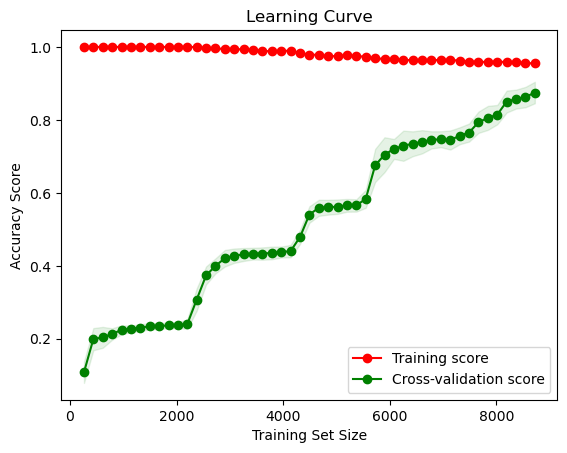

In [ ]:
#Learning Curve

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(logistic_classifier,X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

The lower accuracy with 10-fold cross-validation compared to the single training run suggests the logistic regression classifier is likely overfitting when not cross-validated. The test accuracy, which is similar to the cross-validation accuracy, indicates that cross-validation offers a more realistic measure of the model's ability to generalize to new data.


---

## Logisitic Regression on Over-Sampled Data

### Pre-processing

In [ ]:
# Set random seed for TensorFlow
tf.random.set_seed(42)

In [ ]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
from sklearn.utils import shuffle
X, Y = shuffle(X_train_scaled, Y_train, random_state=42)

In [ ]:
X_train_shuffled = shuffle(X_train_scaled, random_state = 42)
Y_train_shuffled = shuffle(y_train, random_state = 42)

In [ ]:
# Oversampling
smote = SMOTE(random_state=42)  # You can specify different options if needed
# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train_shuffled, Y_train_shuffled)

In [ ]:
Y_train_resampled = keras.utils.to_categorical(y_resampled, 10)

---

### Running The Classifier

In [ ]:
logistic_classifier_new = LogisticRegression()

In [ ]:
# 1. Linear Classifier (Logistic Regression) with 10-fold cross-validation

# Perform 10-fold cross-validation
cross_val_scores_resampled = cross_val_score(logistic_classifier_new, X_resampled, y_resampled, cv=10, n_jobs=-1, scoring = 'accuracy')
# print("Linear Classifier (Logistic Regression) - Cross-Validation Accuracy:")
# print(cross_val_scores)
print("Average Cross-Validation Accuracy:", np.mean(cross_val_scores_resampled))

In [ ]:
# Train the linear classifier on the entire training set
logistic_classifier_new.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
# evaluate on train set
print("Linear Classifier (Logistic Regression) - Train Set Accuracy:", logistic_classifier_new.score(X_resampled, y_resampled))

Linear Classifier (Logistic Regression) - Train Set Accuracy: 0.9768888888888889


In [ ]:
# Evaluate on the test set
logistic_test_predictions_resampled = logistic_classifier_new.predict(X_test_scaled)
logistic_test_accuracy_resampled = accuracy_score(y_test, logistic_test_predictions_resampled)
print("Linear Classifier (Logistic Regression) - Test Accuracy:", logistic_test_accuracy_resampled)

Linear Classifier (Logistic Regression) - Test Accuracy: 0.8864077669902912


---

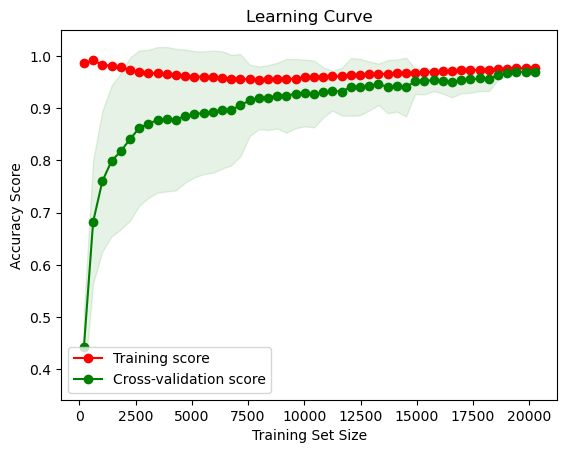

In [ ]:
#Learning Curve

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(logistic_classifier_new,X_resampled, y_resampled, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

Achieving an 80% accuracy with a logistic regression classifier on both the original and oversampled datasets leads us to hypothesize that our dataset could potentially be linearly separable.

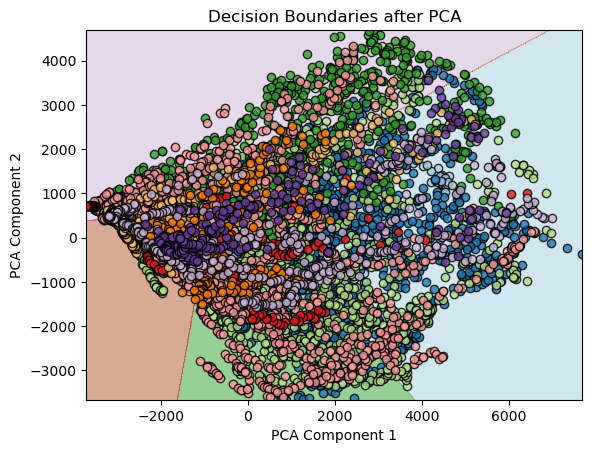

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(x_train_pca, y_train)

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, steps), np.linspace(ymin, ymax, steps))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=cmap, alpha=0.5)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    for i, color in enumerate(cmap.colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', linewidth=1, alpha=0.8)

plot_decision_boundary(x_train_pca, y_train, model_pca)
plt.title("Decision Boundaries after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


To validate our hypothesis, we visualize the classification outcomes against the decision boundaries and observe that our dataset exhibits a nearly linearly separable pattern.

---
Summary of Logistic Regression
- on train : 0.976
- on 10-fold CV : 0.970
- on test : 0.886
---

#**MLP**

---
### Helper functions

In [ ]:
#TO BUILD A MODEL
def MLP_builder_concise(hidden_layers : Tuple[int, ...], activation_function: Union['relu', 'sigmoid', 'tanh'], learning_rate: int, momentum_rate: int, optimizer):

    model = Sequential()
    for nodes in hidden_layers:
        model.add(Dense(units=nodes, activation=activation_function, input_dim=2304))
    model.add(Dense(10, activation='softmax'))
    if optimizer == 'SGD':
        model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate, momentum = momentum_rate), metrics=['accuracy'])
    elif optimizer == 'Adam':
        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    elif optimizer == 'RMSprop':
        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [ ]:
#TO TRAIN A MODEL ON THE ORIGINAL DATASET
def Train_MLP(model,epochs,batch_size):
    history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data = (X_test, Y_test))
    return history

In [ ]:
#TO TRAIN A MODEL ON THE OVERSAMPLED DATASET
def Train_MLP_resampled(model,epochs,batch_size):
    history = model.fit(X_resampled, Y_train_resampled, batch_size=batch_size, epochs=epochs, verbose=1, validation_data = (X_test, Y_test))
    return history

---

### Building a Model and Training it

In [ ]:
model = MLP_builder_concise((2048, 1024, 512, 256, 128, 64, 32), 'relu', 0.001, 0.9, 'SGD')
model.summary()
history = Train_MLP(model, 50, 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              4720640   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

---
Visualization for Test Dataset

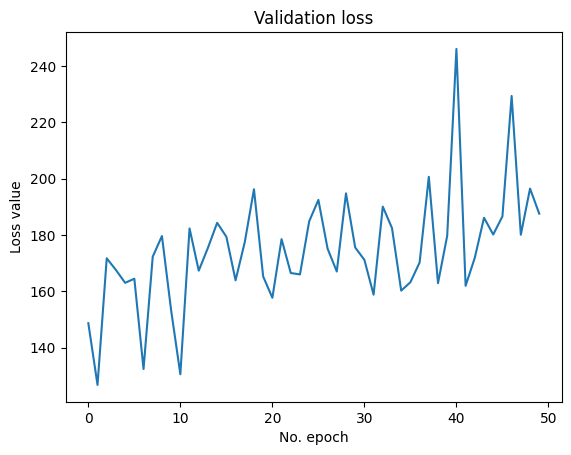

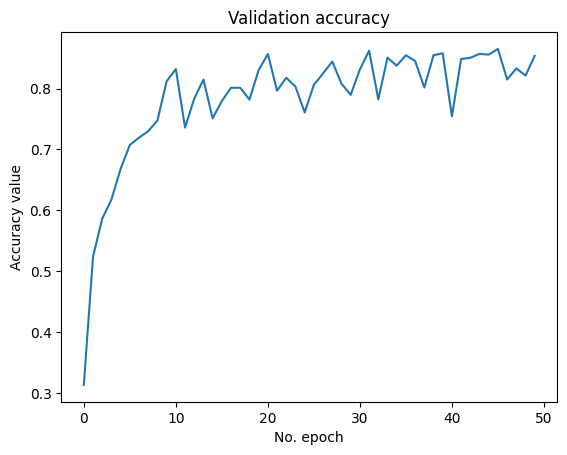

In [ ]:
# plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.show()

---

### Training on Over-Sampled Data

In [ ]:
model_resampled = MLP_builder_concise((2048, 1024, 512, 256, 128, 64, 32), 'relu', 0.001, 0.9, 'SGD')
model_resampled.summary()
history_resampled = Train_MLP_resampled(model, 50, 32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2048)              4720640   
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)               

---
Visualization for Test Dataset

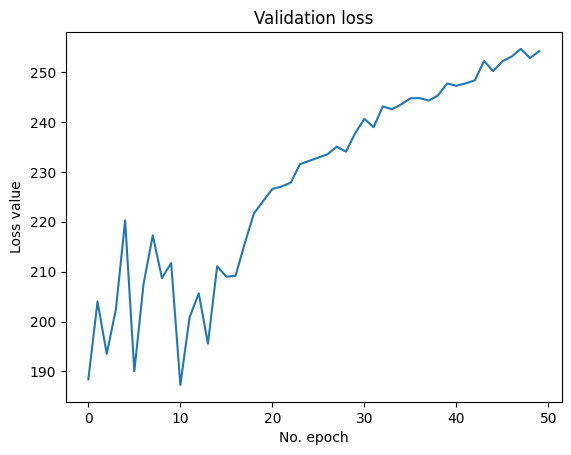

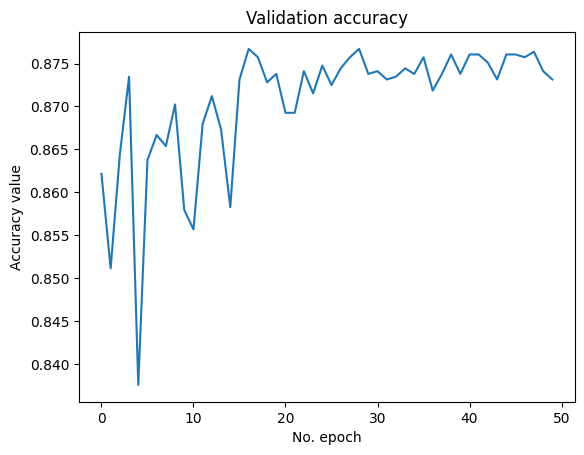

In [ ]:
# plot the validation loss
plt.plot(history_resampled.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# plot the validation accuracy
plt.plot(history_resampled.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.show()

---

## Keras Tuner for Hyperparameter Tuning



In [ ]:
from kerastuner.tuners import RandomSearch, GridSearch
from kerastuner.engine.hyperparameters import HyperParameters
from typing import Tuple, Union

def MLP_builder_Tuning(hp: HyperParameters):
    hidden_layers = hp.Int('hidden_layers', min_value=1, max_value=5)
    activation_function = hp.Choice('activation_function', values=['relu', 'sigmoid', 'tanh'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='log')
    momentum_rate = hp.Float('momentum_rate', min_value=0.0, max_value=0.9)
    optimizer = hp.Choice('optimizer', values=['SGD', 'Adam', 'RMSprop'])

    model = Sequential()
    for _ in range(hidden_layers):
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation=activation_function, input_dim=2304))

    model.add(Dense(10, activation='softmax'))

    if optimizer == 'SGD':
        model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate, momentum=momentum_rate), metrics=['accuracy'])
    elif optimizer == 'Adam':
        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    elif optimizer == 'RMSprop':
        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Create a RandomSearch tuner
tuner = RandomSearch(
    MLP_builder_Tuning,
    objective='val_accuracy',
    max_trials=20,  # Number of hyperparameter combinations to try
    directory='my_tuning_directory',  # Directory to save the tuning results
    project_name='my_project'
    seed=42
)

# Perform the hyperparameter search
tuner.search(x=X, y=Y, epochs=50, validation_data=(X_test_scaled, Y_test))

# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best Hyperparameters:", best_hps.get_config()['values'])

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/project_02/tuner0.json
Best Hyperparameters: {'hidden_layers': 3, 'activation_function': 'tanh', 'learning_rate': 0.00025119182437365734, 'momentum_rate': 0.5447158923617061, 'optimizer': 'Adam', 'units': 64}


In [ ]:
# the hyperparameter combinations tested, and the results for each trial:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/project_02
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 17 summary
Hyperparameters:
hidden_layers: 3
activation_function: tanh
learning_rate: 0.00025119182437365734
momentum_rate: 0.5447158923617061
optimizer: Adam
units: 64
Score: 0.8961164951324463

Trial 08 summary
Hyperparameters:
hidden_layers: 2
activation_function: relu
learning_rate: 0.0018328792004345589
momentum_rate: 0.8211090234237743
optimizer: Adam
units: 416
Score: 0.8799352645874023

Trial 15 summary
Hyperparameters:
hidden_layers: 3
activation_function: sigmoid
learning_rate: 0.0028337156470149183
momentum_rate: 0.6025815325694163
optimizer: Adam
units: 64
Score: 0.8796116709709167

Trial 09 summary
Hyperparameters:
hidden_layers: 2
activation_function: relu
learning_rate: 0.001172720778910653
momentum_rate: 0.3635802674492997
optimizer: SGD
units: 320
Score: 0.8621359467506409

Trial 00 summary
Hyperparameters:
hidden_la

---

### Building and Training the Best Model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X, Y, epochs=50, validation_data=(X_test_scaled, Y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
303/303 [==============================] - 4s 7ms/step - loss: 1.5211 - accuracy: 0.4573 - val_loss: 1.2724 - val_accuracy: 0.5709
Epoch 2/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9038 - accuracy: 0.7163 - val_loss: 0.9047 - val_accuracy: 0.7129
Epoch 3/50
303/303 [==============================] - 1s 5ms/step - loss: 0.6175 - accuracy: 0.8134 - val_loss: 0.7284 - val_accuracy: 0.7773
Epoch 4/50
303/303 [==============================] - 2s 6ms/step - loss: 0.4546 - accuracy: 0.8673 - val_loss: 0.6890 - val_accuracy: 0.7974
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 0.3682 - accuracy: 0.8973 - val_loss: 0.7606 - val_accuracy: 0.7816
Epoch 6/50
303/303 [==============================] - 2s 7ms/step - loss: 0.2943 - accuracy: 0.9204 - val_loss: 0.5426 - val_accuracy: 0.8495
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.2584 - accuracy: 0.9260 - val_loss: 0.5448 - val_accuracy: 0.8550
Epoch 

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model for the best epoch
hypermodel.fit(X, Y, epochs=best_epoch, validation_data=(X_test_scaled, Y_test))

Epoch 1/33
303/303 [==============================] - 5s 8ms/step - loss: 1.5058 - accuracy: 0.4779 - val_loss: 1.2745 - val_accuracy: 0.5599
Epoch 2/33
303/303 [==============================] - 2s 6ms/step - loss: 0.8638 - accuracy: 0.7314 - val_loss: 0.8827 - val_accuracy: 0.7230
Epoch 3/33
303/303 [==============================] - 1s 4ms/step - loss: 0.6017 - accuracy: 0.8166 - val_loss: 0.7298 - val_accuracy: 0.7816
Epoch 4/33
303/303 [==============================] - 1s 4ms/step - loss: 0.4535 - accuracy: 0.8669 - val_loss: 0.6469 - val_accuracy: 0.8071
Epoch 5/33
303/303 [==============================] - 1s 5ms/step - loss: 0.3814 - accuracy: 0.8871 - val_loss: 0.6932 - val_accuracy: 0.8100
Epoch 6/33
303/303 [==============================] - 1s 5ms/step - loss: 0.3048 - accuracy: 0.9142 - val_loss: 0.5881 - val_accuracy: 0.8350
Epoch 7/33
303/303 [==============================] - 2s 5ms/step - loss: 0.2627 - accuracy: 0.9257 - val_loss: 0.5487 - val_accuracy: 0.8515
Epoch 

In [ ]:
eval_result = hypermodel.evaluate(X_test_scaled, Y_test)
print("[test loss, test accuracy]:", eval_result)

97/97 [==============================] - 1s 7ms/step - loss: 0.5468 - accuracy: 0.8854
[test loss, test accuracy]: [0.5468313694000244, 0.8854368925094604]


---
## Hyperparameter Tuning on Over-Sampled data

In [ ]:
from kerastuner.tuners import RandomSearch, GridSearch
from kerastuner.engine.hyperparameters import HyperParameters
from typing import Tuple, Union

def MLP_builder_Tuning_Resampled(hp: HyperParameters):
    hidden_layers = hp.Int('hidden_layers', min_value=1, max_value=5)
    activation_function = hp.Choice('activation_function', values=['relu', 'sigmoid', 'tanh'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='log')
    momentum_rate = hp.Float('momentum_rate', min_value=0.0, max_value=0.9)
    optimizer = hp.Choice('optimizer', values=['SGD', 'Adam', 'RMSprop'])

    model = Sequential()
    for _ in range(hidden_layers):
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation=activation_function, input_dim=2304))

    model.add(Dense(10, activation='softmax'))

    if optimizer == 'SGD':
        model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate, momentum=momentum_rate), metrics=['accuracy'])
    elif optimizer == 'Adam':
        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    elif optimizer == 'RMSprop':
        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Create a RandomSearch tuner
tuner_resampled = RandomSearch(
    MLP_builder_Tuning_Resampled,
    objective='val_accuracy',
    max_trials=20,  # Number of hyperparameter combinations to try
    directory='my_tuning_directory',  # Directory to save the tuning result
    project_name='resampled_project'
)

# Perform the hyperparameter search
tuner_resampled.search(x=X_resampled, y=Y_train_resampled, epochs=50, validation_data=(X_test_scaled, Y_test))

# Get the best hyperparameters
best_hps_resampled = tuner_resampled.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best Hyperparameters:", best_hps_resampled.get_config()['values'])


Trial 20 Complete [00h 02m 36s]
val_accuracy: 0.7805825471878052

Best val_accuracy So Far: 0.9055016040802002
Total elapsed time: 00h 59m 42s
Best Hyperparameters: {'hidden_layers': 1, 'activation_function': 'tanh', 'learning_rate': 0.005918527511879378, 'momentum_rate': 0.6727247864656305, 'optimizer': 'SGD', 'units': 384}


### Building and Training the Best Model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_tuned_resampled = tuner_resampled.hypermodel.build(best_hps_resampled)
history_tuned_resampled = model_tuned_resampled.fit(X_resampled, Y_train_resampled, epochs=50, validation_data=(X_test_scaled, Y_test))

val_acc_per_epoch_resampled = history_tuned_resampled.history['val_accuracy']
best_epoch_resampled = val_acc_per_epoch_resampled.index(max(val_acc_per_epoch_resampled)) + 1
print('Best epoch: %d' % (best_epoch_resampled,))

Epoch 1/50
704/704 [==============================] - 4s 4ms/step - loss: 1.1652 - accuracy: 0.6726 - val_loss: 1.4278 - val_accuracy: 0.4948
Epoch 2/50
704/704 [==============================] - 4s 5ms/step - loss: 0.5896 - accuracy: 0.8578 - val_loss: 0.9594 - val_accuracy: 0.7405
Epoch 3/50
704/704 [==============================] - 3s 5ms/step - loss: 0.4046 - accuracy: 0.9164 - val_loss: 0.7883 - val_accuracy: 0.7974
Epoch 4/50
704/704 [==============================] - 3s 4ms/step - loss: 0.3119 - accuracy: 0.9364 - val_loss: 0.7231 - val_accuracy: 0.8074
Epoch 5/50
704/704 [==============================] - 3s 4ms/step - loss: 0.2539 - accuracy: 0.9489 - val_loss: 0.7076 - val_accuracy: 0.8291
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 0.2154 - accuracy: 0.9590 - val_loss: 0.6620 - val_accuracy: 0.8379
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 0.1870 - accuracy: 0.9638 - val_loss: 0.7371 - val_accuracy: 0.8006
Epoch 

In [ ]:
hypermodel_resampled = tuner_resampled.hypermodel.build(best_hps)
# Retrain the model
hypermodel_resampled.fit(X_resampled, Y_train_resampled, epochs=best_epoch_resampled, validation_data=(X_test_scaled, Y_test))

Epoch 1/45
704/704 [==============================] - 4s 4ms/step - loss: 1.8509 - accuracy: 0.4030 - val_loss: 1.7138 - val_accuracy: 0.3252
Epoch 2/45
704/704 [==============================] - 3s 5ms/step - loss: 1.1665 - accuracy: 0.6730 - val_loss: 1.4156 - val_accuracy: 0.4518
Epoch 3/45
704/704 [==============================] - 4s 6ms/step - loss: 0.7602 - accuracy: 0.7935 - val_loss: 1.1635 - val_accuracy: 0.6207
Epoch 4/45
704/704 [==============================] - 3s 4ms/step - loss: 0.5229 - accuracy: 0.8747 - val_loss: 0.9270 - val_accuracy: 0.7346
Epoch 5/45
704/704 [==============================] - 3s 4ms/step - loss: 0.3725 - accuracy: 0.9227 - val_loss: 0.7529 - val_accuracy: 0.7964
Epoch 6/45
704/704 [==============================] - 3s 4ms/step - loss: 0.2775 - accuracy: 0.9443 - val_loss: 0.6498 - val_accuracy: 0.8343
Epoch 7/45
704/704 [==============================] - 3s 4ms/step - loss: 0.2132 - accuracy: 0.9571 - val_loss: 0.5723 - val_accuracy: 0.8579
Epoch 

In [ ]:
eval_result_resampled = hypermodel_resampled.evaluate(X_test_scaled, Y_test)
print("[test loss, test accuracy]:", eval_result_resampled)

97/97 [==============================] - 1s 5ms/step - loss: 0.6689 - accuracy: 0.8796
[test loss, test accuracy]: [0.6688652634620667, 0.8796116709709167]


---

## Visualization for Parameter Tuning

### Activation Function

Epoch 1/50
303/303 [==============================] - 5s 9ms/step - loss: 1.8067 - accuracy: 0.3134 - val_loss: 107.3786 - val_accuracy: 0.3278
Epoch 2/50
303/303 [==============================] - 3s 9ms/step - loss: 1.3508 - accuracy: 0.5087 - val_loss: 145.7074 - val_accuracy: 0.4935
Epoch 3/50
303/303 [==============================] - 3s 10ms/step - loss: 1.0162 - accuracy: 0.6377 - val_loss: 194.0181 - val_accuracy: 0.5735
Epoch 4/50
303/303 [==============================] - 4s 13ms/step - loss: 0.7489 - accuracy: 0.7344 - val_loss: 191.6930 - val_accuracy: 0.5518
Epoch 5/50
303/303 [==============================] - 4s 13ms/step - loss: 0.5981 - accuracy: 0.7924 - val_loss: 269.3474 - val_accuracy: 0.5683
Epoch 6/50
303/303 [==============================] - 4s 13ms/step - loss: 0.5163 - accuracy: 0.8225 - val_loss: 219.9760 - val_accuracy: 0.6152
Epoch 7/50
303/303 [==============================] - 3s 10ms/step - loss: 0.5028 - accuracy: 0.8350 - val_loss: 143.2626 - val_accu

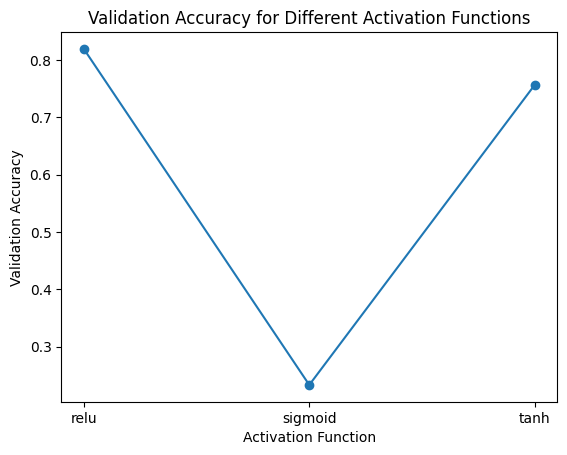

In [ ]:
activation_function = ['relu','sigmoid','tanh']
# Lists to store results
accuracy_results = []

for af in activation_function:
    # Build the model
    model_activation = MLP_builder_concise((2048, 1024, 512, 256, 128, 64, 32), af, 0.001, 0.9, 'SGD')
    # Train the model
    history_activation = Train_MLP(model_activation, 50, 32)
    # Store the accuracy
    accuracy_results.append(history_activation.history['val_accuracy'][-1])

plt.plot(activation_function, accuracy_results, marker='o')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Activation Functions')
plt.show()

While ReLU yielded the best performance for the given model, it does not necessarily imply that sigmoid or tanh would not excel with a different set of hyperparameters.

### Optimizer Function

Epoch 1/50
303/303 [==============================] - 4s 10ms/step - loss: 1.8043 - accuracy: 0.3372 - val_loss: 126.7910 - val_accuracy: 0.3761
Epoch 2/50
303/303 [==============================] - 2s 8ms/step - loss: 1.3536 - accuracy: 0.4973 - val_loss: 135.4585 - val_accuracy: 0.5311
Epoch 3/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0341 - accuracy: 0.6270 - val_loss: 132.0925 - val_accuracy: 0.6094
Epoch 4/50
303/303 [==============================] - 2s 6ms/step - loss: 0.7593 - accuracy: 0.7364 - val_loss: 144.0190 - val_accuracy: 0.6540
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 0.6042 - accuracy: 0.7943 - val_loss: 116.7418 - val_accuracy: 0.6744
Epoch 6/50
303/303 [==============================] - 2s 6ms/step - loss: 0.4616 - accuracy: 0.8491 - val_loss: 268.0613 - val_accuracy: 0.4515
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.4292 - accuracy: 0.8639 - val_loss: 131.8298 - val_accuracy

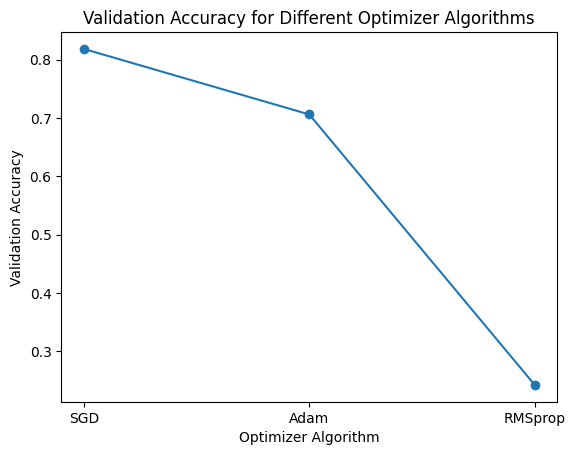

In [ ]:
optimizer_function = ['SGD','Adam','RMSprop']

# Lists to store results
accuracy_results = []

for opt_func in optimizer_function:
    # Build the model
    model_optimizer = MLP_builder_concise((2048, 1024, 512, 256, 128, 64, 32),'relu', 0.001, 0.9, opt_func)
    # Train the model
    history_optimizer = Train_MLP(model_optimizer, 50, 32)
    # Store the accuracy
    accuracy_results.append(history_optimizer.history['val_accuracy'][-1])

plt.plot(optimizer_function, accuracy_results, marker='o')
plt.xlabel('Optimizer Algorithm')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Optimizer Algorithms')
plt.show()


Although SGD demonstrated the best performance for the current model, it doesn't necessarily indicate that Adam or RMSprop wouldn't outperform it with an alternative set of hyperparameters.

### Momentum Rates

In [ ]:
momentum_function = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Lists to store results
accuracy_results = []

for mom_func in momentum_function:
    # Build the model
    model_momentum = MLP_builder_concise((2048, 1024, 512, 256, 128, 64, 32),'relu', 0.001, mom_func, 'SGD')
    # Train the model
    history_momentum = Train_MLP(model_momentum, 50, 32)
    # Store the accuracy
    accuracy_results.append(history_momentum.history['val_accuracy'][-1])

Epoch 1/50
303/303 [==============================] - 5s 8ms/step - loss: 2.1415 - accuracy: 0.2137 - val_loss: 91.6111 - val_accuracy: 0.2330
Epoch 2/50
303/303 [==============================] - 3s 9ms/step - loss: 1.9477 - accuracy: 0.2383 - val_loss: 105.9526 - val_accuracy: 0.2476
Epoch 3/50
303/303 [==============================] - 3s 9ms/step - loss: 1.8761 - accuracy: 0.3137 - val_loss: 107.1952 - val_accuracy: 0.2560
Epoch 4/50
303/303 [==============================] - 2s 6ms/step - loss: 1.8264 - accuracy: 0.3847 - val_loss: 109.5746 - val_accuracy: 0.3113
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 1.7760 - accuracy: 0.4235 - val_loss: 112.3607 - val_accuracy: 0.3194
Epoch 6/50
303/303 [==============================] - 2s 6ms/step - loss: 1.7200 - accuracy: 0.4410 - val_loss: 116.4733 - val_accuracy: 0.3324
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 1.6563 - accuracy: 0.4524 - val_loss: 107.8498 - val_accuracy: 

NameError: ignored

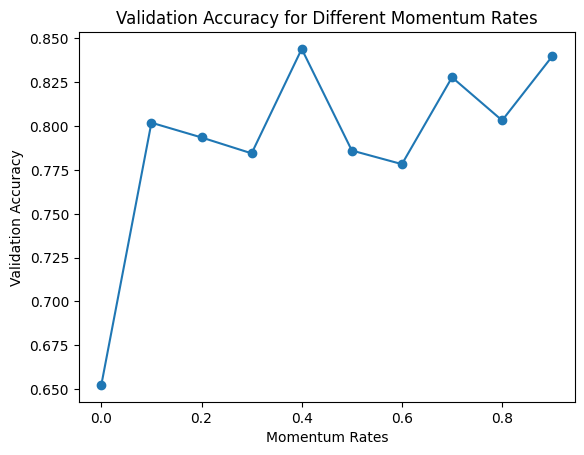

In [ ]:
plt.plot(momentum_function, accuracy_results, marker='o')
plt.xlabel('Momentum Rates')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Momentum Rates')
plt.show()

We can observe how an increase in the momentum rates led to an increase in test accuracy for our model.